# GTEx Isoform Transcript Length Overview 2

Used GTFtools to calculate transript length. 

**GTF annotation file:** GTF isoform output from FLAIR collapse (used GENCODE v26 as the reference annotation file).

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\FLAIR\\work_in_progress'

In [4]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [5]:
data_dir = 'gtex_v9_data\\data_for_analysis\\my_flair_data'

In [6]:
transcript_length_file_path = os.path.join(data_dir, 'gencode26_transcript_isoform_length.txt')

In [7]:
transcript_length_df = pd.read_csv(transcript_length_file_path, sep='\t')

## Part 2: Overview of Dataset

In [8]:
transcript_length_df.head(5)

,isoform,gene,length
0,123d6ced-595a-4042-a667-96ae3ece5471,chr1:11000,2541
1,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a,chr1:14000,1770
2,6033210c-c373-46ef-acb8-f1e1cbdc2c3e,chr1:14000,1989
3,3102b78e-4e80-4feb-9750-69652ad53508,chr1:16000,1972
4,6db3d3e0-7af0-431d-b712-23fd3e09807a,chr1:17000,1882


In [9]:
transcript_length_df.shape

(1331388, 3)

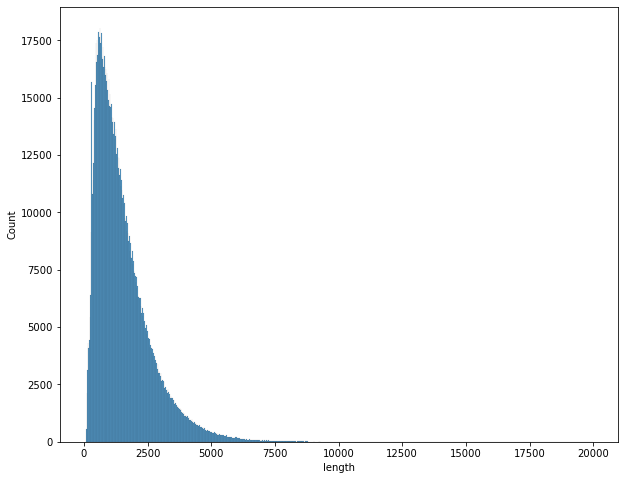

In [10]:
plt.figure(figsize=(10, 8))
sns.histplot(data=transcript_length_df, x="length")
plt.show()

In [11]:
transcript_length_df['isoform']

0          123d6ced-595a-4042-a667-96ae3ece5471
1          f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a
2          6033210c-c373-46ef-acb8-f1e1cbdc2c3e
3          3102b78e-4e80-4feb-9750-69652ad53508
4          6db3d3e0-7af0-431d-b712-23fd3e09807a
                           ...                 
1331383    0ee37bb8-bb10-4273-82a5-8d8c7e014415
1331384    c8929e5c-9817-4fb3-966c-10a82aa28a4d
1331385    b6b61938-5b2c-478b-abd8-3a112f963dba
1331386    ff19ce5d-e284-4e5c-bd7d-52eb08ee57aa
1331387    cb2ece21-38ed-481d-bfcc-05ab52f3a593
Name: isoform, Length: 1331388, dtype: object

In [12]:
transcript_length_df.head()

,isoform,gene,length
0,123d6ced-595a-4042-a667-96ae3ece5471,chr1:11000,2541
1,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a,chr1:14000,1770
2,6033210c-c373-46ef-acb8-f1e1cbdc2c3e,chr1:14000,1989
3,3102b78e-4e80-4feb-9750-69652ad53508,chr1:16000,1972
4,6db3d3e0-7af0-431d-b712-23fd3e09807a,chr1:17000,1882


In [13]:
transcript_length_df.gene

0                  chr1:11000
1                  chr1:14000
2                  chr1:14000
3                  chr1:16000
4                  chr1:17000
                  ...        
1331383    ENSG00000012817.15
1331384    ENSG00000012817.15
1331385    ENSG00000114374.12
1331386     ENSG00000176728.7
1331387    ENSG00000012817.15
Name: gene, Length: 1331388, dtype: object

In [14]:
transcript_length_df['composite_id'] = transcript_length_df.apply(lambda x:'%s_%s' % (x['isoform'],x['gene']),axis=1)

In [15]:
transcript_length_df.head(3)

,isoform,gene,length,composite_id
0,123d6ced-595a-4042-a667-96ae3ece5471,chr1:11000,2541,123d6ced-595a-4042-a667-96ae3ece5471_chr1:11000
1,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a,chr1:14000,1770,f5c7cd72-9d6a-44f2-b6a1-f13cc24f6c2a_chr1:14000
2,6033210c-c373-46ef-acb8-f1e1cbdc2c3e,chr1:14000,1989,6033210c-c373-46ef-acb8-f1e1cbdc2c3e_chr1:14000


In [17]:
transcript_length_df.shape

(1331388, 4)

### Export the dataframe

In [18]:
#transcript_length_df.to_csv('gtex_v9_data\\data_for_analysis\\my_flair_data\\gencode26_transcript_length_df.csv', sep=',')